In [1]:
# Package imports
from zipfile import ZipFile

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import re
import numpy as np
import matplotlib.ticker as ticker


from collections import Counter
import plotly.graph_objects as pgo
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as shc

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FKRTL_2nd = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/DM_FKRTLsekunder_merged.dta')
FKRTL_2nd.head(3)

,PSTV01,PSTV15,FKL02,FKL03,FKL04,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL15,FKL15A,FKL16,FKL16A,FKL17,FKL17A,FKL18,FKL18A,FKL24,FKL24A,FKL24B,FKL25,FKL26,FKL27,FKL28,FKL29,FKL30,FKL31,FKL32,FKL47,FKL48,PSTV03,PSTV05,PSTV07,PSTV08,PSTV09,PSTV10,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18
0,48480077.0,12.569903,101860121V000014,2021-01-01,2021-01-01,JAWA BARAT,KOTA BEKASI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N180,End-stage renal disease,Z49 Care involving dialysis,Z49,Z490,Preparatory care for dialysis,N185,N18,N18 Chronic kidney disease,JAWA BARAT,KOTA BEKASI,PemKab,Puskesmas,RAWAT INAP,3995 - Hemodialysis,regional 1,825500.0,825500.0,825500.0,1971-04-30,LAKI-LAKI,KELAS III,PBPU,JAWA BARAT,KOTA BEKASI,PUSKESMAS,JAWA BARAT,KOTA BEKASI,2021.0,MENINGGAL,2021.0
1,449407207.0,11.795342,102090121V000046,2021-01-01,2021-01-01,BANTEN,SERANG,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N18,Chronic kidney disease,Z99 Dependence on enabling machines and device...,Z99,Z992,Dependence on renal dialysis,N185,N18,N18 Chronic kidney disease,BANTEN,SERANG,PemKab,Puskesmas,NON RAWAT INAP,3995 - Hemodialysis,regional 1,879100.0,879100.0,879100.0,1972-07-15,PEREMPUAN,KELAS III,PBPU,BANTEN,SERANG,PUSKESMAS,BANTEN,SERANG,2021.0,AKTIF,NaN
2,93485717.0,6.449337,104770121V000001,2021-01-01,2021-01-01,JAWA TENGAH,BOYOLALI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N185,"Chronic kidney disease, stage 5",Z49 Care involving dialysis,Z49,Z492,Other dialysis,N185,N18,N18 Chronic kidney disease,JAWA TENGAH,BOYOLALI,PemKab,Puskesmas,NON RAWAT INAP,3995 - Hemodialysis,regional 1,786200.0,786200.0,786200.0,1969-06-09,LAKI-LAKI,KELAS II,PBPU,JAWA TENGAH,BOYOLALI,PUSKESMAS,JAWA TENGAH,BOYOLALI,2021.0,AKTIF,NaN


In [4]:
 FKRTL_2nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202910 entries, 0 to 1202909
Data columns (total 44 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   PSTV01  1202910 non-null  float64       
 1   PSTV15  1202910 non-null  float64       
 2   FKL02   1202910 non-null  object        
 3   FKL03   1202910 non-null  datetime64[ns]
 4   FKL04   1202910 non-null  datetime64[ns]
 5   FKL05   1202910 non-null  category      
 6   FKL06   1202910 non-null  category      
 7   FKL08   1202910 non-null  category      
 8   FKL12   1202910 non-null  category      
 9   FKL13   1202910 non-null  category      
 10  FKL14   1202910 non-null  category      
 11  FKL15   1202910 non-null  category      
 12  FKL15A  1202910 non-null  object        
 13  FKL16   1202910 non-null  object        
 14  FKL16A  1202910 non-null  object        
 15  FKL17   1202910 non-null  category      
 16  FKL17A  1202910 non-null  object        
 17  FKL18   

In [5]:
mask1 = FKRTL_2nd['FKL16A'].str.contains('diabetes|insulin|diabetic|kidney')
mask2 = FKRTL_2nd['FKL18A'].str.contains('diabetes|insulin|diabetic|kidney')
mask3 = FKRTL_2nd['FKL24B'].str.contains('diabetes|insulin|diabetic|kidney')

FKRTL = FKRTL_2nd[mask1|mask2|mask3]

In [6]:
reference_date = pd.Timestamp("2021-12-31") #count age with reference to year 2021
FKRTL['Age'] = ((reference_date - FKRTL['PSTV03']).dt.days // 365) # calculating age per 365 days

<ipython-input-6-a2fb4e862b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FKRTL['Age'] = ((reference_date - FKRTL['PSTV03']).dt.days // 365) # calculating age per 365 days


In [7]:
FKRTL['FKL48'] = FKRTL['FKL48'].astype(int)
FKRTL['PSTV01'] = FKRTL['PSTV01'].astype(int)
FKRTL['PSTV15'] = FKRTL['PSTV15'].round(2)
FKRTL.info()

<ipython-input-7-c6206a239f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FKRTL['FKL48'] = FKRTL['FKL48'].astype(int)
<ipython-input-7-c6206a239f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FKRTL['PSTV01'] = FKRTL['PSTV01'].astype(int)
<ipython-input-7-c6206a239f3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686344 entries, 0 to 1202906
Data columns (total 45 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PSTV01  686344 non-null  int64         
 1   PSTV15  686344 non-null  float64       
 2   FKL02   686344 non-null  object        
 3   FKL03   686344 non-null  datetime64[ns]
 4   FKL04   686344 non-null  datetime64[ns]
 5   FKL05   686344 non-null  category      
 6   FKL06   686344 non-null  category      
 7   FKL08   686344 non-null  category      
 8   FKL12   686344 non-null  category      
 9   FKL13   686344 non-null  category      
 10  FKL14   686344 non-null  category      
 11  FKL15   686344 non-null  category      
 12  FKL15A  686344 non-null  object        
 13  FKL16   686344 non-null  object        
 14  FKL16A  686344 non-null  object        
 15  FKL17   686344 non-null  category      
 16  FKL17A  686344 non-null  object        
 17  FKL18   686344 non-null  obj

# **Exploratory Data Analysis**

### **Evaluating diabetic case per Province**

Evaluate diabetic cases per province
based on Age, Gender, Month


In [8]:
FKRTL.isnull().sum()

PSTV01         0
PSTV15         0
FKL02          0
FKL03          0
FKL04          0
FKL05          0
FKL06          0
FKL08          0
FKL12          0
FKL13          0
FKL14          0
FKL15          0
FKL15A         0
FKL16          0
FKL16A         0
FKL17          0
FKL17A         0
FKL18          0
FKL18A         0
FKL24          0
FKL24A         0
FKL24B         0
FKL25          0
FKL26          0
FKL27          0
FKL28          0
FKL29          0
FKL30          0
FKL31          0
FKL32          0
FKL47          0
FKL48          0
PSTV03         0
PSTV05         0
PSTV07         0
PSTV08         0
PSTV09         0
PSTV10         0
PSTV12         0
PSTV13         0
PSTV14         0
PSTV16         0
PSTV17         0
PSTV18    647424
Age            0
dtype: int64

In [9]:
def categorize_diabetes(diabetes):
    if 'E10' in diabetes:
        return 'type 1 DM'
    elif 'E11' in diabetes:
        return 'type 2 DM'
    elif 'E12' in diabetes or 'E13' in diabetes or 'E14' in diabetes or 'O24' in diabetes:
        return 'Other types DM'
    else:
        return 'Non-related to Diabetes'

# Step 4: Apply the Categorization Function
FKRTL['DM_Category'] = FKRTL['FKL24B'].apply(categorize_diabetes)

<ipython-input-9-b1a712650816>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FKRTL['DM_Category'] = FKRTL['FKL24B'].apply(categorize_diabetes)


In [10]:
FKRTL.tail()

,PSTV01,PSTV15,FKL02,FKL03,FKL04,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL15,FKL15A,FKL16,FKL16A,FKL17,FKL17A,FKL18,FKL18A,FKL24,FKL24A,FKL24B,FKL25,FKL26,FKL27,FKL28,FKL29,FKL30,FKL31,FKL32,FKL47,FKL48,PSTV03,PSTV05,PSTV07,PSTV08,PSTV09,PSTV10,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,Age,DM_Category
1202895,13066353,3.49,8991221V019333,2021-12-31,2021-12-31,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N18,Chronic kidney disease,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,N200,N20,N20 Calculus of kidney and ureter,GORONTALO,BONE BOLANGO,PemKab,Rumah sakit,RS KELAS C,"8907 - Consultation, described as comprehensive",regional 3,381600.0,381600.0,381600,1966-02-20,LAKI-LAKI,KELAS I,PPU,GORONTALO,BOALEMO,PUSKESMAS,GORONTALO,BOALEMO,2021.0,AKTIF,NaN,55,Non-related to Diabetes
1202896,19661343,3.40,8991221V019403,2021-12-31,2021-12-31,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PBPU,Kelas 3,Sehat,Z00 General examination and investigation of p...,Z00,Z000,General medical examination,Z49 Care involving dialysis,Z49,Z491,Extracorporeal dialysis,N185,N18,N18 Chronic kidney disease,SULAWESI UTARA,KOTA MANADO,Vertikal,Rumah sakit,RS KELAS A,3995 - Hemodialysis,regional 3,994200.0,994200.0,994200,1964-11-16,LAKI-LAKI,KELAS I,PBPU,SULAWESI UTARA,BOLAANG MONGONDOW TIMUR,PUSKESMAS,SULAWESI UTARA,BOLAANG MONGONDOW TIMUR,2021.0,AKTIF,NaN,57,Non-related to Diabetes
1202897,399154516,11.57,91651221V003693,2021-12-31,2021-12-31,BALI,KLUNGKUNG,Rumah sakit,PBI APBD,Kelas 3,Sehat,E14 Unspecified diabetes mellitus,E14,E14,Unspecified diabetes mellitus,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,E147,E14,E14 Unspecified diabetes mellitus,BALI,KARANG ASEM,PemKab,Puskesmas,RAWAT INAP,"8903 - Interview and evaluation, described as ...",regional 2,192100.0,192100.0,192100,1972-04-08,LAKI-LAKI,KELAS III,PBI APBD,BALI,KARANG ASEM,PUSKESMAS,BALI,KARANG ASEM,2021.0,AKTIF,NaN,49,Other types DM
1202899,74586559,11.05,92661221V009244,2021-12-31,2021-12-31,ACEH,ACEH SELATAN,Rumah sakit,PPU,Kelas 3,Sehat,E11 Type 2 diabetes mellitus,E11,E114,Non-insulin-dependent diabetes mellitus with n...,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,G629,G62,G62 Other polyneuropathies,ACEH,ACEH SELATAN,PemKab,Puskesmas,NON RAWAT INAP,,regional 3,185500.0,185500.0,185500,1961-09-22,PEREMPUAN,KELAS I,PPU,ACEH,ACEH SELATAN,PUSKESMAS,ACEH,ACEH SELATAN,2021.0,AKTIF,NaN,60,Non-related to Diabetes
1202906,11450018,9.00,95091221V005681,2021-12-31,2021-12-31,KALIMANTAN BARAT,KETAPANG,Rumah sakit,PBPU,Kelas 3,Sehat,E11 Type 2 diabetes mellitus,E11,E111,Non-insulin-dependent diabetes mellitus with k...,Z86 Personal history of certain other diseases,Z86,Z863,"Personal history of endocrine, nutritional and...",E119,E11,E11 Type 2 diabetes mellitus,KALIMANTAN BARAT,KETAPANG,Swasta,Dokter Umum,DOKTER PRAKTER PERORANGAN,9059 - Other microscopic examination of blood,regional 3,183500.0,183500.0,183500,1966-05-16,PEREMPUAN,KELAS I,PBPU,KALIMANTAN BARAT,KETAPANG,DOKTER UMUM,KALIMANTAN BARAT,KETAPANG,2021.0,AKTIF,NaN,55,type 2 DM


In [11]:
FKRTL.loc[FKRTL['Age'] >= 90].describe().round(2)

,PSTV01,PSTV15,FKL32,FKL47,FKL48,PSTV16,PSTV18,Age
count,3.040000e+02,304.00,304.00,304.00,304.00,304.0,44.0,304.00
mean,6.391085e+07,11.41,679391.45,679391.45,679391.45,2021.0,2021.0,91.43
std,9.831682e+07,3.10,1643946.84,1643946.84,1643946.84,0.0,0.0,1.08
min,1.190730e+05,0.96,110700.00,110700.00,110700.00,2021.0,2021.0,90.00
25%,3.076955e+06,11.69,183900.00,183900.00,183900.00,2021.0,2021.0,91.00
50%,3.658371e+07,12.47,190400.00,190400.00,190400.00,2021.0,2021.0,91.00
75%,7.022998e+07,12.93,192400.00,192400.00,192400.00,2021.0,2021.0,92.00
max,4.496064e+08,13.44,12156800.00,12156800.00,12156800.00,2021.0,2021.0,95.00


In [12]:
#number of range between age of 60 to 90
len(FKRTL[(FKRTL["Age"] >= 60) & (FKRTL["Age"] <= 90)])

347532

In [13]:
# total sum of claim for the age group above 90
filtered_df = FKRTL[(FKRTL['Age'] > 60) & (FKRTL["Age"] < 90)]
sum_value = filtered_df['FKL48'].sum()
sum_value

187103435893

In [14]:
filtered_df.describe().round(0)

,PSTV01,PSTV15,FKL32,FKL47,FKL48,PSTV16,PSTV18,Age
count,324001.0,324001.0,324001.0,324001.0,324001.0,324001.0,18120.0,324001.0
mean,84647459.0,11.0,568983.0,577790.0,577478.0,2021.0,2021.0,67.0
std,104035542.0,3.0,2770683.0,2875386.0,2874584.0,0.0,0.0,5.0
min,5145.0,1.0,76700.0,76700.0,76700.0,2021.0,2021.0,61.0
25%,27696547.0,11.0,183500.0,183500.0,183500.0,2021.0,2021.0,63.0
50%,55229372.0,12.0,190400.0,190400.0,190400.0,2021.0,2021.0,66.0
75%,84111783.0,13.0,192400.0,192400.0,192400.0,2021.0,2021.0,70.0
max,455102464.0,15.0,210167800.0,210167800.0,210167800.0,2021.0,2021.0,89.0


In [15]:
FKRTL['DM_Category'].unique().tolist()

['Non-related to Diabetes', 'type 1 DM', 'type 2 DM', 'Other types DM']

In [16]:
# Create age group by binning
bins = [0,25, 35, 45, 60,75,90, np.inf]
labels = ['0-25','25-35','35-45','45-60','60-75','75-90','90+']
FKRTL['Age_Group'] = pd.cut(FKRTL['Age'], bins=bins, labels=labels, right=False)

<ipython-input-16-844d86dd76c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FKRTL['Age_Group'] = pd.cut(FKRTL['Age'], bins=bins, labels=labels, right=False)


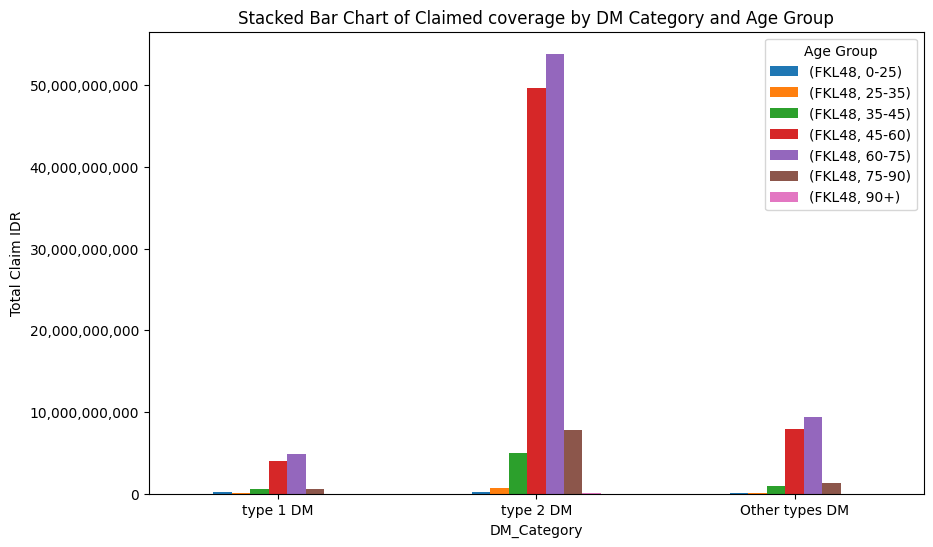

In [17]:
# Group data for plotting
age_cat = FKRTL.groupby(['DM_Category', 'Age_Group']).agg({'FKL48':'sum'}).unstack()

#filtering only the DM related Diagnosis
filtered_grouped = age_cat.loc[['type 1 DM', 'type 2 DM', 'Other types DM']]

# Create the stacked bar chart
ax = filtered_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Stacked Bar Chart of Claimed coverage by DM Category and Age Group')
plt.xlabel('DM_Category')
plt.ylabel('Total Claim IDR')
plt.legend(title='Age Group')

# Rotate x-axis labels if necessary
plt.xticks(rotation=0)

#format numerical values with a thousands separator (period) and without any decimal places.
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

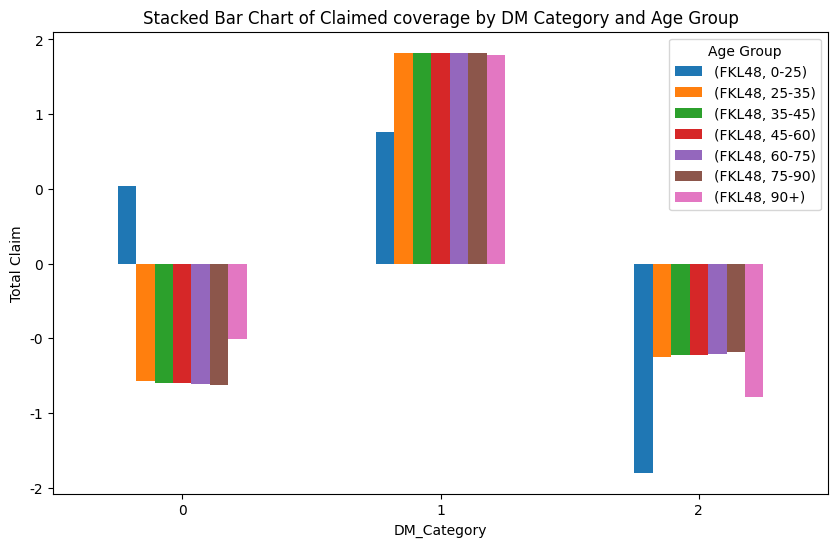

In [18]:
# Group data for plotting
age_cat = FKRTL.groupby(['DM_Category', 'Age_Group']).agg({'FKL48':'sum'}).unstack()

#filtering only the DM related Diagnosis
filtered_grouped = age_cat.loc[['type 1 DM', 'type 2 DM', 'Other types DM']]

# Inisialisasi Standar Scaler
scaler = StandardScaler()

# Menggunakan Standar Scaler untuk mengubah data
scaled_data = scaler.fit_transform(filtered_grouped)

# Membuat DataFrame baru dari data yang telah diubah
scaled_df = pd.DataFrame(scaled_data, columns=filtered_grouped.columns)


# Create the stacked bar chart
ax = scaled_df.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Stacked Bar Chart of Claimed coverage by DM Category and Age Group')
plt.xlabel('DM_Category')
plt.ylabel('Total Claim')
plt.legend(title='Age Group')

# Rotate x-axis labels if necessary
plt.xticks(rotation=0)

#format numerical values with a thousands separator (period) and without any decimal places.
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [19]:
scaled_df

FKL48                                                    \
Age_Group      0-25     25-35     35-45     45-60     60-75     75-90   
0          0.521446 -0.787511 -0.796147 -0.800860 -0.806717 -0.815297   
1          0.877728  1.411041  1.410305  1.409869  1.409294  1.408382   
2         -1.399174 -0.623531 -0.614158 -0.609010 -0.602576 -0.593085   

                     
Age_Group       90+  
0         -0.505615  
1          1.396602  
2         -0.890987

In [20]:
filtered_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, type 1 DM to Other types DM
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (FKL48, 0-25)   3 non-null      int64
 1   (FKL48, 25-35)  3 non-null      int64
 2   (FKL48, 35-45)  3 non-null      int64
 3   (FKL48, 45-60)  3 non-null      int64
 4   (FKL48, 60-75)  3 non-null      int64
 5   (FKL48, 75-90)  3 non-null      int64
 6   (FKL48, 90+)    3 non-null      int64
dtypes: int64(7)
memory usage: 192.0+ bytes


Unique ID Peserta kasus **DIABETES**

In [21]:
len(FKRTL['PSTV01'].unique())

51590

**Add pivot for Families (total families sum/province) **

statistic descriptive = 1 dari 300 orang mengidap diabetes (based on percentage)

statistic inferential = 100000000 pengidap diabetes

differentiate Populasi pengidap based on age group dibagi populasi total per age group ( lansia 6000 / populasi lansia (per provinsi)

Sum of each percentage of population ratio.

In [22]:
df_bulan = FKRTL
df_bulan['Bulan'] = pd.to_datetime(df_bulan['FKL03']).dt.strftime('%B')
df_bulan.head()

<ipython-input-22-8bc6050da324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bulan['Bulan'] = pd.to_datetime(df_bulan['FKL03']).dt.strftime('%B')


,PSTV01,PSTV15,FKL02,FKL03,FKL04,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL15,FKL15A,FKL16,FKL16A,FKL17,FKL17A,FKL18,FKL18A,FKL24,FKL24A,FKL24B,FKL25,FKL26,FKL27,FKL28,FKL29,FKL30,FKL31,FKL32,FKL47,FKL48,PSTV03,PSTV05,PSTV07,PSTV08,PSTV09,PSTV10,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,Age,DM_Category,Age_Group,Bulan
0,48480077,12.57,101860121V000014,2021-01-01,2021-01-01,JAWA BARAT,KOTA BEKASI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N180,End-stage renal disease,Z49 Care involving dialysis,Z49,Z490,Preparatory care for dialysis,N185,N18,N18 Chronic kidney disease,JAWA BARAT,KOTA BEKASI,PemKab,Puskesmas,RAWAT INAP,3995 - Hemodialysis,regional 1,825500.0,825500.0,825500,1971-04-30,LAKI-LAKI,KELAS III,PBPU,JAWA BARAT,KOTA BEKASI,PUSKESMAS,JAWA BARAT,KOTA BEKASI,2021.0,MENINGGAL,2021.0,50,Non-related to Diabetes,45-60,January
1,449407207,11.80,102090121V000046,2021-01-01,2021-01-01,BANTEN,SERANG,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N18,Chronic kidney disease,Z99 Dependence on enabling machines and device...,Z99,Z992,Dependence on renal dialysis,N185,N18,N18 Chronic kidney disease,BANTEN,SERANG,PemKab,Puskesmas,NON RAWAT INAP,3995 - Hemodialysis,regional 1,879100.0,879100.0,879100,1972-07-15,PEREMPUAN,KELAS III,PBPU,BANTEN,SERANG,PUSKESMAS,BANTEN,SERANG,2021.0,AKTIF,NaN,49,Non-related to Diabetes,45-60,January
2,93485717,6.45,104770121V000001,2021-01-01,2021-01-01,JAWA TENGAH,BOYOLALI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N185,"Chronic kidney disease, stage 5",Z49 Care involving dialysis,Z49,Z492,Other dialysis,N185,N18,N18 Chronic kidney disease,JAWA TENGAH,BOYOLALI,PemKab,Puskesmas,NON RAWAT INAP,3995 - Hemodialysis,regional 1,786200.0,786200.0,786200,1969-06-09,LAKI-LAKI,KELAS II,PBPU,JAWA TENGAH,BOYOLALI,PUSKESMAS,JAWA TENGAH,BOYOLALI,2021.0,AKTIF,NaN,52,Non-related to Diabetes,45-60,January
3,87632410,12.34,104770121V000040,2021-01-01,2021-01-01,JAWA TENGAH,BOYOLALI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N185,"Chronic kidney disease, stage 5",Z49 Care involving dialysis,Z49,Z492,Other dialysis,N185,N18,N18 Chronic kidney disease,JAWA TENGAH,BOYOLALI,PemKab,Rumah sakit,RS KELAS B,3995 - Hemodialysis,regional 1,786200.0,786200.0,786200,1957-02-10,LAKI-LAKI,KELAS III,PBPU,JAWA TENGAH,BOYOLALI,DOKTER UMUM,JAWA TENGAH,KLATEN,2021.0,MENINGGAL,2021.0,64,Non-related to Diabetes,60-75,January
4,70064419,4.33,106400121V000003,2021-01-01,2021-01-01,LAMPUNG,LAMPUNG BARAT,Rumah sakit,PPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N18,Chronic kidney disease,Z99 Dependence on enabling machines and device...,Z99,Z992,Dependence on renal dialysis,N185,N18,N18 Chronic kidney disease,LAMPUNG,PESISIR BARAT,Swasta,Dokter Umum,DOKTER PRAKTER PERORANGAN,3995 - Hemodialysis,regional 2,793300.0,793300.0,793300,1968-03-25,PEREMPUAN,KELAS I,PPU,LAMPUNG,PESISIR BARAT,DOKTER UMUM,LAMPUNG,PESISIR BARAT,2021.0,AKTIF,NaN,53,Non-related to Diabetes,45-60,January


In [23]:
month_dm = pd.pivot_table(FKRTL, values= ['PSTV01'],
                              index=['Bulan'],
                              aggfunc={'PSTV01':'nunique'}).reset_index()
month_dm.rename(columns={'Bulan':'Bulan',
                             'PSTV01':'jumlah_peserta'}, inplace=True)

bulan_to_angka = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_dm['Bulan_Angka'] = month_dm['Bulan'].map(bulan_to_angka)

month_dm_sorted = month_dm.sort_values(by='Bulan_Angka', ascending=True)
month_dm_sorted = month_dm_sorted.drop('Bulan_Angka', axis=1)
month_dm_sorted

,Bulan,jumlah_peserta
4,January,24422
3,February,23234
7,March,26472
0,April,25258
8,May,24023
6,June,24800
5,July,21419
1,August,22117
11,September,23305
10,October,24063


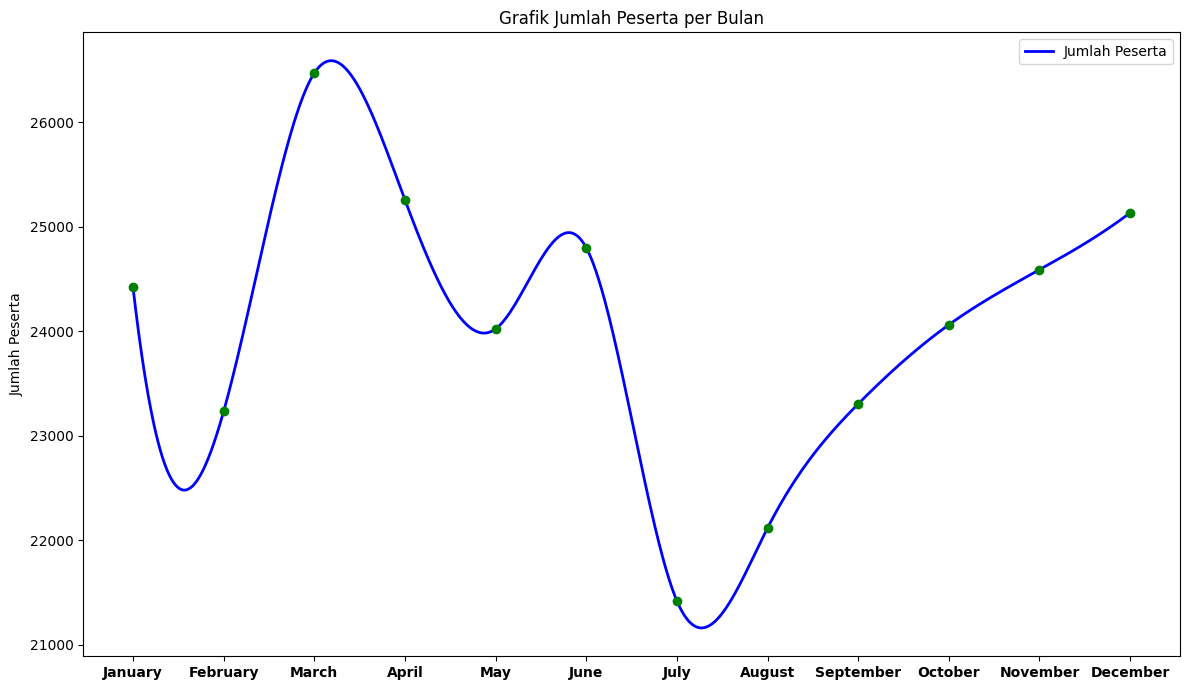

In [24]:
from scipy.interpolate import make_interp_spline

# Create a smooth line plot
x = np.arange(len(month_dm_sorted['Bulan']))
y = month_dm_sorted['jumlah_peserta']

# Generate more x values for a smoother curve
xnew = np.linspace(x.min(), x.max(), 1000)
spl = make_interp_spline(x, y, k=3)
ynew = spl(xnew)


plt.figure(figsize=(12, 7))  # Ukuran plot (opsional)
plt.plot(xnew, ynew, color='b', label='Jumlah Peserta', linewidth=2)
plt.scatter(x, y, color='green', zorder=6)
plt.title('Grafik Jumlah Peserta per Bulan')
plt.ylabel('Jumlah Peserta')
plt.legend()

plt.xticks(x, month_dm_sorted['Bulan'], rotation=0, fontsize=8)
plt.tick_params(axis='x', which='major', labelsize='medium', labelrotation=0) #create boldtype x tick label
for label in plt.gca().xaxis.get_ticklabels():
    label.set_fontweight('bold')

plt.tight_layout()  # Mengatur tata letak agar rapi

plt.show()  # Tampilkan plot

In [25]:
prov_dm = pd.pivot_table(FKRTL, values= ['PSTV01'],
                              index=['PSTV09'],
                              aggfunc={'PSTV01':'nunique'}).reset_index()
prov_dm.rename(columns={'PSTV09':'Provinsi',
                             'PSTV01':'jumlah_peserta'}, inplace=True)
prov_dm.sort_values(by = 'jumlah_peserta', ascending = False, inplace = True)
prov_dm.style.background_gradient(axis=0, cmap='Reds')


,Provinsi,jumlah_peserta
14,JAWA TIMUR,7989
12,JAWA TENGAH,7371
11,JAWA BARAT,6523
10,DKI JAKARTA,3978
1,SUMATERA UTARA,2319
15,BANTEN,1890
0,ACEH,1776
13,DAERAH ISTIMEWA YOGYAKARTA,1711
2,SUMATERA BARAT,1686
16,BALI,1655


In [26]:
prov_dm.to_csv('DM_Provinsi_2021.csv')

<ipython-input-40-38d9940fc218>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('rainbow', n)


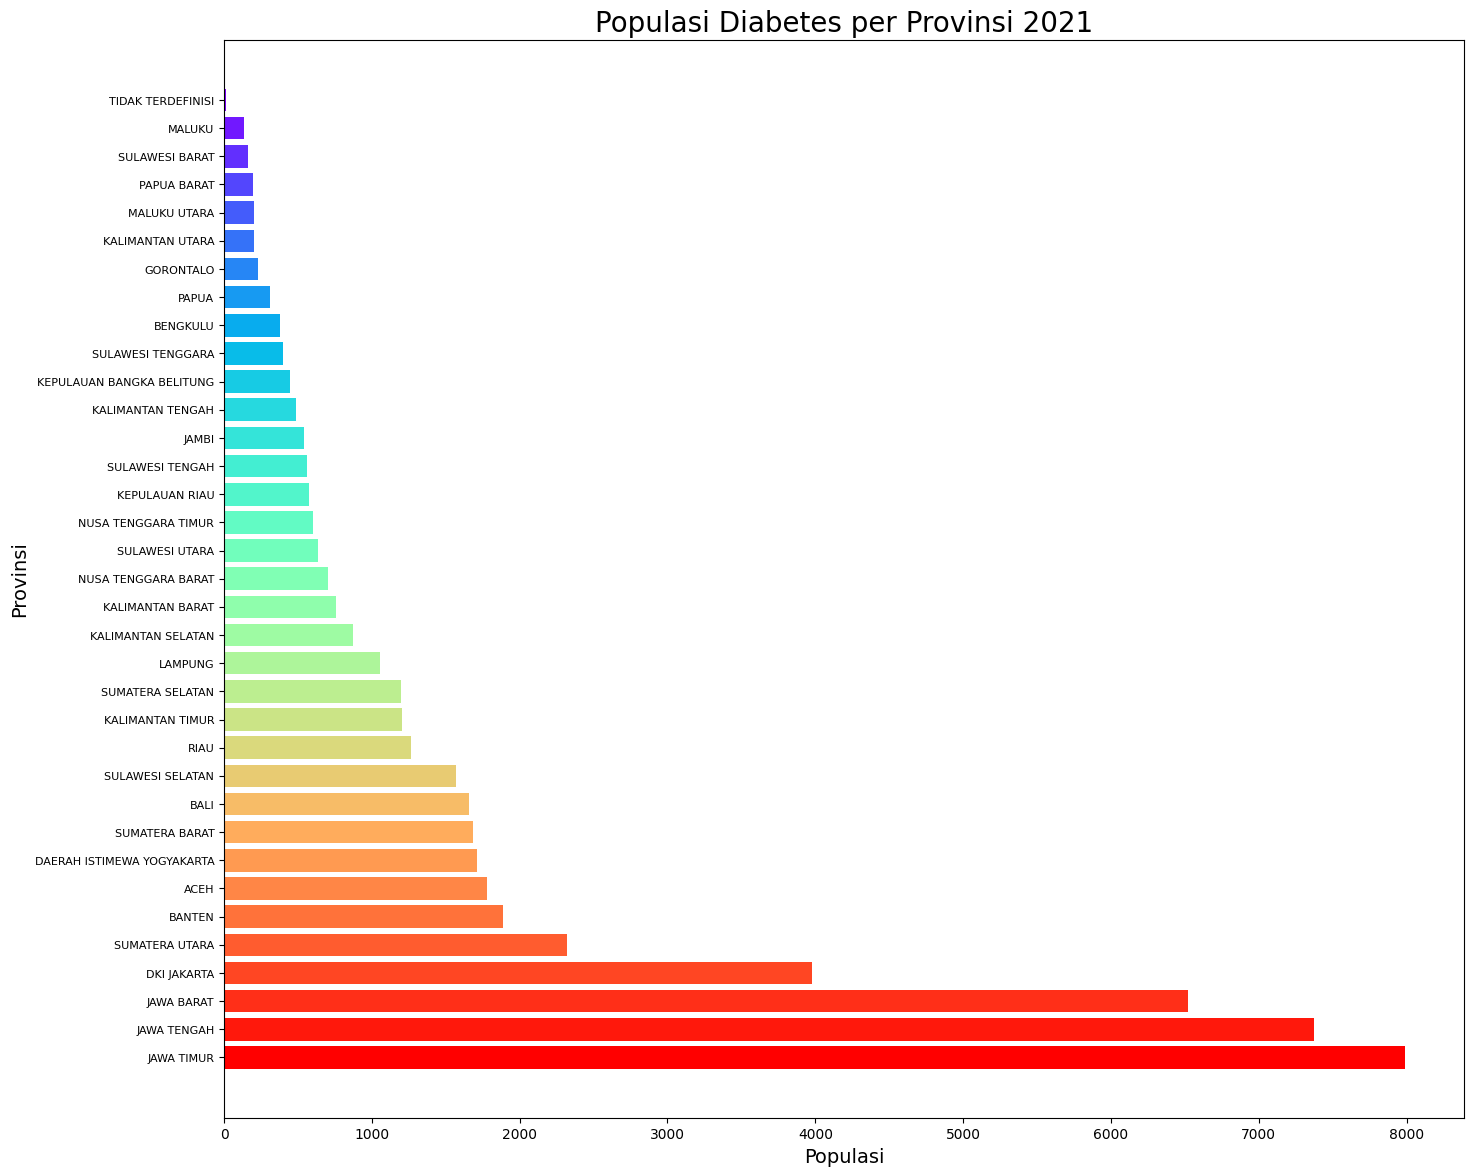

In [40]:
plt.figure(figsize=(16,14))

n = len(prov_dm['Provinsi'])
# Creating a color map
color_map = plt.cm.get_cmap('rainbow', n)

# Creating a list of colors using the color map [::1 randomise colour]
colors = color_map(np.arange(n))[::-1]

plt.barh(prov_dm['Provinsi'],prov_dm['jumlah_peserta'], color=colors, height = 0.8)


plt.title('Populasi Diabetes per Provinsi 2021', fontsize=20)
plt.xlabel('Populasi', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)

plt.xticks(fontsize=10, rotation =0)  # rotation is used if x-tick labels are overlapping
plt.yticks(fontsize=8)


plt.show()


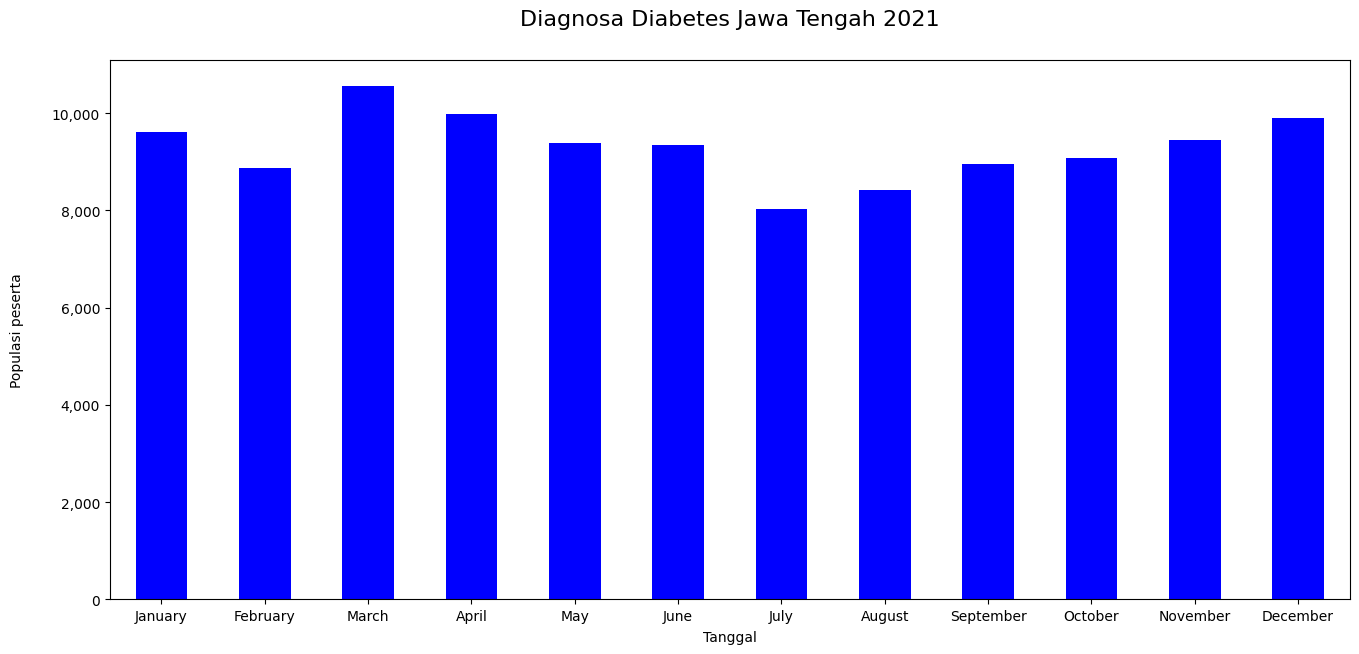

In [28]:
Jawa_tengah = FKRTL[FKRTL['PSTV09'] == 'JAWA TENGAH']

grouped_data = Jawa_tengah.groupby(pd.Grouper(key='FKL03', freq='M'))['PSTV01'].count()

grouped_data.index = grouped_data.index.strftime('%B')

fig, ax = plt.subplots(figsize=(16, 7))


# Plot the time series line plot for 'Item A'
grouped_data.plot(kind='bar', ax=ax, color='blue')
ax.set_xlabel('Tanggal',fontsize=10, labelpad=5)
ax.set_ylabel('Populasi peserta', fontsize=10,labelpad=20)
ax.set_title('Diagnosa Diabetes Jawa Tengah 2021', fontsize=16, y=1.05)

# Rotate x-axis labels if necessary
plt.xticks(rotation=0)

#format numerical values with a thousands separator (period) and without any decimal places.
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

##**Heatmap, Drop columns and Encoding**

In [29]:
FKRTL.tail()

,PSTV01,PSTV15,FKL02,FKL03,FKL04,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL15,FKL15A,FKL16,FKL16A,FKL17,FKL17A,FKL18,FKL18A,FKL24,FKL24A,FKL24B,FKL25,FKL26,FKL27,FKL28,FKL29,FKL30,FKL31,FKL32,FKL47,FKL48,PSTV03,PSTV05,PSTV07,PSTV08,PSTV09,PSTV10,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,Age,DM_Category,Age_Group,Bulan
1202895,13066353,3.49,8991221V019333,2021-12-31,2021-12-31,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PPU,Kelas 3,Sehat,N18 Chronic kidney disease,N18,N18,Chronic kidney disease,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,N200,N20,N20 Calculus of kidney and ureter,GORONTALO,BONE BOLANGO,PemKab,Rumah sakit,RS KELAS C,"8907 - Consultation, described as comprehensive",regional 3,381600.0,381600.0,381600,1966-02-20,LAKI-LAKI,KELAS I,PPU,GORONTALO,BOALEMO,PUSKESMAS,GORONTALO,BOALEMO,2021.0,AKTIF,NaN,55,Non-related to Diabetes,45-60,December
1202896,19661343,3.40,8991221V019403,2021-12-31,2021-12-31,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PBPU,Kelas 3,Sehat,Z00 General examination and investigation of p...,Z00,Z000,General medical examination,Z49 Care involving dialysis,Z49,Z491,Extracorporeal dialysis,N185,N18,N18 Chronic kidney disease,SULAWESI UTARA,KOTA MANADO,Vertikal,Rumah sakit,RS KELAS A,3995 - Hemodialysis,regional 3,994200.0,994200.0,994200,1964-11-16,LAKI-LAKI,KELAS I,PBPU,SULAWESI UTARA,BOLAANG MONGONDOW TIMUR,PUSKESMAS,SULAWESI UTARA,BOLAANG MONGONDOW TIMUR,2021.0,AKTIF,NaN,57,Non-related to Diabetes,45-60,December
1202897,399154516,11.57,91651221V003693,2021-12-31,2021-12-31,BALI,KLUNGKUNG,Rumah sakit,PBI APBD,Kelas 3,Sehat,E14 Unspecified diabetes mellitus,E14,E14,Unspecified diabetes mellitus,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,E147,E14,E14 Unspecified diabetes mellitus,BALI,KARANG ASEM,PemKab,Puskesmas,RAWAT INAP,"8903 - Interview and evaluation, described as ...",regional 2,192100.0,192100.0,192100,1972-04-08,LAKI-LAKI,KELAS III,PBI APBD,BALI,KARANG ASEM,PUSKESMAS,BALI,KARANG ASEM,2021.0,AKTIF,NaN,49,Other types DM,45-60,December
1202899,74586559,11.05,92661221V009244,2021-12-31,2021-12-31,ACEH,ACEH SELATAN,Rumah sakit,PPU,Kelas 3,Sehat,E11 Type 2 diabetes mellitus,E11,E114,Non-insulin-dependent diabetes mellitus with n...,Z09 Follow-up examination after treatment for ...,Z09,Z098,Follow-up examination after other treatment fo...,G629,G62,G62 Other polyneuropathies,ACEH,ACEH SELATAN,PemKab,Puskesmas,NON RAWAT INAP,,regional 3,185500.0,185500.0,185500,1961-09-22,PEREMPUAN,KELAS I,PPU,ACEH,ACEH SELATAN,PUSKESMAS,ACEH,ACEH SELATAN,2021.0,AKTIF,NaN,60,Non-related to Diabetes,60-75,December
1202906,11450018,9.00,95091221V005681,2021-12-31,2021-12-31,KALIMANTAN BARAT,KETAPANG,Rumah sakit,PBPU,Kelas 3,Sehat,E11 Type 2 diabetes mellitus,E11,E111,Non-insulin-dependent diabetes mellitus with k...,Z86 Personal history of certain other diseases,Z86,Z863,"Personal history of endocrine, nutritional and...",E119,E11,E11 Type 2 diabetes mellitus,KALIMANTAN BARAT,KETAPANG,Swasta,Dokter Umum,DOKTER PRAKTER PERORANGAN,9059 - Other microscopic examination of blood,regional 3,183500.0,183500.0,183500,1966-05-16,PEREMPUAN,KELAS I,PBPU,KALIMANTAN BARAT,KETAPANG,DOKTER UMUM,KALIMANTAN BARAT,KETAPANG,2021.0,AKTIF,NaN,55,type 2 DM,45-60,December


In [30]:
FKRTL_heat = FKRTL.loc[:, ['FKL05', 'FKL06','FKL08','FKL12','FKL13','FKL14','FKL16A','FKL18A','FKL24B','FKL28','FKL29','FKL31','FKL48','PSTV05','PSTV07','PSTV12','PSTV13','PSTV14','Age']]
FKRTL_heat.tail()

,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL16A,FKL18A,FKL24B,FKL28,FKL29,FKL31,FKL48,PSTV05,PSTV07,PSTV12,PSTV13,PSTV14,Age
1202895,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PPU,Kelas 3,Sehat,Chronic kidney disease,Follow-up examination after other treatment fo...,N20 Calculus of kidney and ureter,Rumah sakit,RS KELAS C,regional 3,381600,LAKI-LAKI,KELAS I,PUSKESMAS,GORONTALO,BOALEMO,55
1202896,SULAWESI UTARA,KOTA MANADO,Rumah sakit,PBPU,Kelas 3,Sehat,General medical examination,Extracorporeal dialysis,N18 Chronic kidney disease,Rumah sakit,RS KELAS A,regional 3,994200,LAKI-LAKI,KELAS I,PUSKESMAS,SULAWESI UTARA,BOLAANG MONGONDOW TIMUR,57
1202897,BALI,KLUNGKUNG,Rumah sakit,PBI APBD,Kelas 3,Sehat,Unspecified diabetes mellitus,Follow-up examination after other treatment fo...,E14 Unspecified diabetes mellitus,Puskesmas,RAWAT INAP,regional 2,192100,LAKI-LAKI,KELAS III,PUSKESMAS,BALI,KARANG ASEM,49
1202899,ACEH,ACEH SELATAN,Rumah sakit,PPU,Kelas 3,Sehat,Non-insulin-dependent diabetes mellitus with n...,Follow-up examination after other treatment fo...,G62 Other polyneuropathies,Puskesmas,NON RAWAT INAP,regional 3,185500,PEREMPUAN,KELAS I,PUSKESMAS,ACEH,ACEH SELATAN,60
1202906,KALIMANTAN BARAT,KETAPANG,Rumah sakit,PBPU,Kelas 3,Sehat,Non-insulin-dependent diabetes mellitus with k...,"Personal history of endocrine, nutritional and...",E11 Type 2 diabetes mellitus,Dokter Umum,DOKTER PRAKTER PERORANGAN,regional 3,183500,PEREMPUAN,KELAS I,DOKTER UMUM,KALIMANTAN BARAT,KETAPANG,55


In [31]:
FKRTL_heat = FKRTL_heat.astype({
    'FKL05': str,  # convert to integer
    'FKL06': str,  # convert to float
    'FKL08': str,  # convert to categorical
    'FKL12': str,
    'FKL13': str,
    'FKL14': str,
    'FKL16A': str,
    'FKL18A': str,
    'FKL24B': str,
    'FKL28': str,
    'FKL29': str,
    'FKL31': str,
    'PSTV05': str,
    'PSTV07': str,
    'PSTV12': str,
    'PSTV13': str,
    'PSTV14': str,
    })

In [32]:
FKRTL_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686344 entries, 0 to 1202906
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   FKL05   686344 non-null  object
 1   FKL06   686344 non-null  object
 2   FKL08   686344 non-null  object
 3   FKL12   686344 non-null  object
 4   FKL13   686344 non-null  object
 5   FKL14   686344 non-null  object
 6   FKL16A  686344 non-null  object
 7   FKL18A  686344 non-null  object
 8   FKL24B  686344 non-null  object
 9   FKL28   686344 non-null  object
 10  FKL29   686344 non-null  object
 11  FKL31   686344 non-null  object
 12  FKL48   686344 non-null  int64 
 13  PSTV05  686344 non-null  object
 14  PSTV07  686344 non-null  object
 15  PSTV12  686344 non-null  object
 16  PSTV13  686344 non-null  object
 17  PSTV14  686344 non-null  object
 18  Age     686344 non-null  int64 
dtypes: int64(2), object(17)
memory usage: 104.7+ MB


In [33]:
encoder = lambda x: LabelEncoder().fit_transform(x)
FKRTL_heat = FKRTL_heat.apply(encoder)

In [34]:
FKRTL_heat.tail()

,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL16A,FKL18A,FKL24B,FKL28,FKL29,FKL31,FKL48,PSTV05,PSTV07,PSTV12,PSTV13,PSTV14,Age
1202895,30,204,1,4,2,3,474,481,655,7,22,2,702,0,1,2,6,59,50
1202896,30,204,1,3,2,3,1007,450,653,7,20,2,1068,0,1,2,30,64,52
1202897,1,151,1,1,2,3,2720,481,164,6,19,1,213,0,3,2,1,130,44
1202899,0,4,1,4,2,3,1561,481,272,6,17,2,193,1,1,2,0,4,55
1202906,11,149,1,3,2,3,1559,1211,161,1,2,2,185,1,1,0,11,153,50


In [35]:
FKRTL_heat['FKL13'].unique()

array([2, 1, 0])

<ipython-input-36-5d5f32f989e8>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'FKL05'),
  Text(0, 1.5, 'FKL06'),
  Text(0, 2.5, 'FKL08'),
  Text(0, 3.5, 'FKL12'),
  Text(0, 4.5, 'FKL13'),
  Text(0, 5.5, 'FKL14'),
  Text(0, 6.5, 'FKL16A'),
  Text(0, 7.5, 'FKL18A'),
  Text(0, 8.5, 'FKL24B'),
  Text(0, 9.5, 'FKL28'),
  Text(0, 10.5, 'FKL29'),
  Text(0, 11.5, 'FKL31'),
  Text(0, 12.5, 'FKL48'),
  Text(0, 13.5, 'PSTV05'),
  Text(0, 14.5, 'PSTV07'),
  Text(0, 15.5, 'PSTV12'),
  Text(0, 16.5, 'PSTV13'),
  Text(0, 17.5, 'PSTV14'),
  Text(0, 18.5, 'Age')])

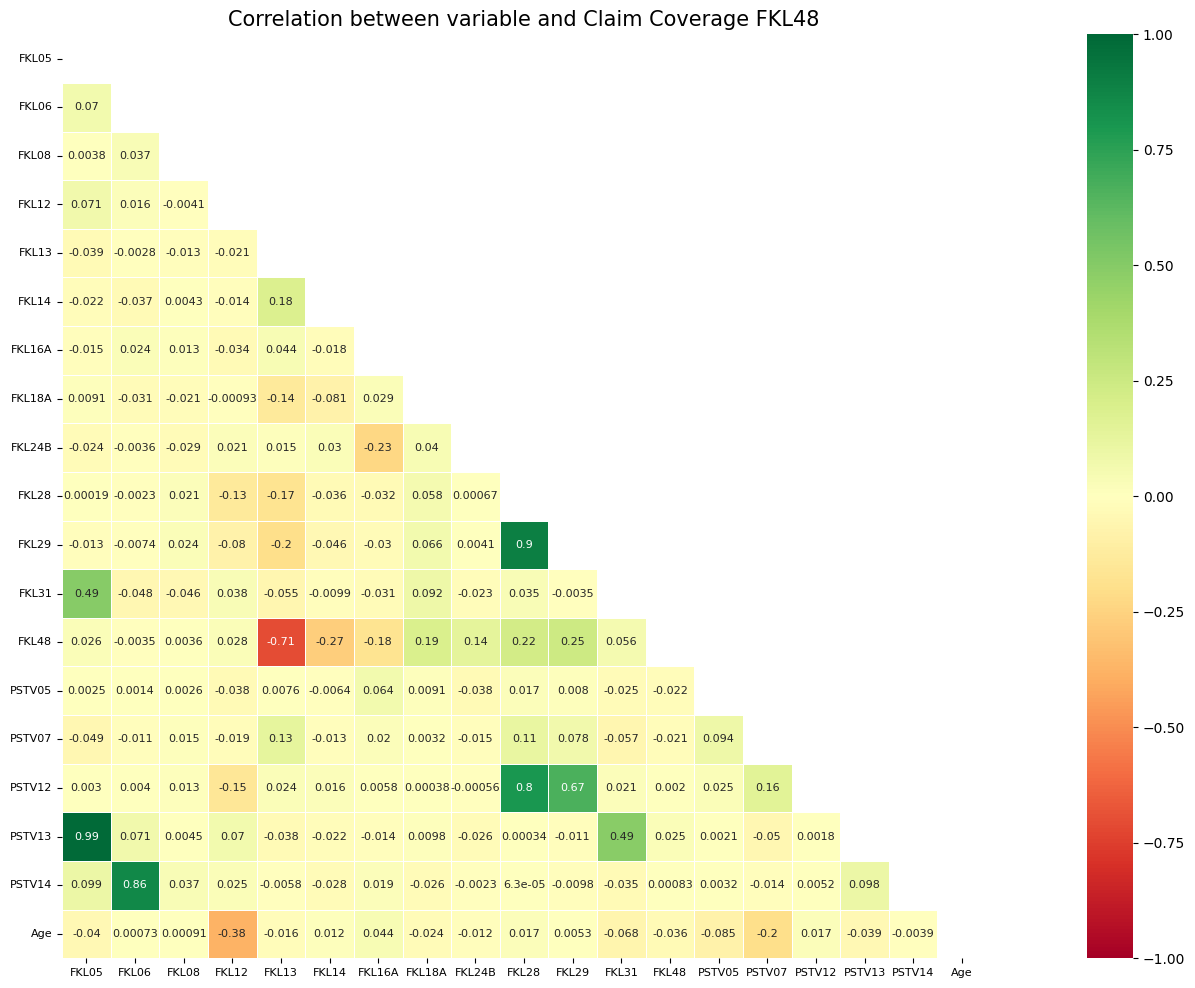

In [36]:
#Heatmap Correlation
corr = FKRTL_heat.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 8})
plt.xticks(rotation=0, fontsize=8)
plt.title('Correlation between variable and Claim Coverage FKL48', fontsize=15)
plt.yticks(fontsize=8,rotation=0 )